<a href="https://colab.research.google.com/github/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/blob/master/LR_vs_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def get_dataset(N = 100_000, seed=1, 
                means_1 = np.array([0,0]), 
                means_2 = np.array([2, 2]), 
                cov_mat = np.array([[1,0.75], [0.75,1]])):
  np.random.seed(seed)
  
  x1 = np.random.multivariate_normal(means_1, cov_mat, N)
  x2 = np.random.multivariate_normal(means_2, cov_mat, N)
  X = np.vstack([x1, x2])
  y = np.hstack([[0]*len(x1), [1]*len(x2)]) 
  return X,y

In [0]:
cov_mat = np.array([[1,0.75, 0.75], [0.75, 1, 0.75], [0.75, 0.75,1]])
means_1 = np.array([0,0, 0])
means_2 = np.array([4, 4, 4]) 

In [195]:
cov_mat

array([[1.  , 0.75, 0.75],
       [0.75, 1.  , 0.75],
       [0.75, 0.75, 1.  ]])

In [0]:
X, y = get_dataset(N=100, cov_mat=cov_mat, means_1=means_1, means_2=means_2)

In [197]:
X.shape, y.shape

((200, 3), (200,))

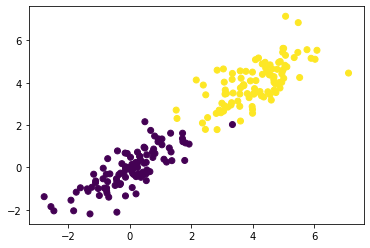

In [198]:
plt.scatter(*X.T[:2, :], c=y)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
Ns = np.logspace(1, 6, 30)

In [201]:
LDA_results_C = []
LR_results_C = []
LDA_results_W1 = []
LR_results_W1 = []
LDA_results_W2 = []
LR_results_W2 = []
LDA_results_W3 = []
LR_results_W3 = []
for i, N in enumerate(Ns):
  print(i, int(N))
  clf_LR = LogisticRegression()
  clf_LDA = LinearDiscriminantAnalysis()
  X, y = get_dataset(N=int(N), cov_mat=cov_mat, means_1=means_1, means_2=means_2)
  clf_LR.fit(X,y)
  clf_LDA.fit(X,y)
  LDA_results_C.append(clf_LDA.intercept_)
  LR_results_C.append(clf_LR.intercept_)
  LDA_results_W1.append(clf_LDA.coef_[0,0])
  LR_results_W1.append(clf_LR.coef_[0,0])
  LDA_results_W2.append(clf_LDA.coef_[0,1])
  LR_results_W2.append(clf_LR.coef_[0,1])
  LDA_results_W3.append(clf_LDA.coef_[0,2])
  LR_results_W3.append(clf_LR.coef_[0,2])

0 10
1 14
2 22
3 32
4 48
5 72
6 108
7 161
8 239
9 356
10 529
11 788
12 1172
13 1743
14 2592
15 3856
16 5736
17 8531
18 12689
19 18873
20 28072
21 41753
22 62101
23 92367
24 137382
25 204335
26 303919
27 452035
28 672335
29 1000000


In [0]:
W1, W2, W3 = -np.linalg.inv(cov_mat).dot((means_1-means_2).reshape(-1,1))
C = np.dot((means_1+means_2).reshape(1, -1), np.linalg.inv(cov_mat)).dot(means_1-means_2)/2

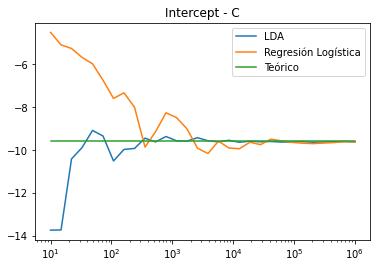

In [203]:
plt.title('Intercept - C')
plt.semilogx(Ns, LDA_results_C, label='LDA')
plt.semilogx(Ns, LR_results_C, label='Regresión Logística')
plt.semilogx(Ns, [C]*len(Ns), label='Teórico')
plt.legend()
plt.show()

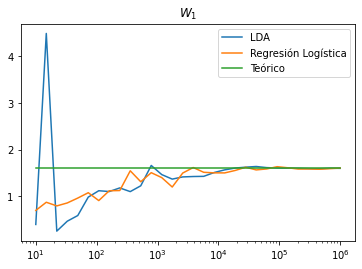

In [204]:
plt.title('$W_1$')
plt.semilogx(Ns, LDA_results_W1, label='LDA')
plt.semilogx(Ns, LR_results_W1, label='Regresión Logística')
plt.semilogx(Ns, [W1]*len(Ns), label='Teórico')
plt.legend()
plt.show()

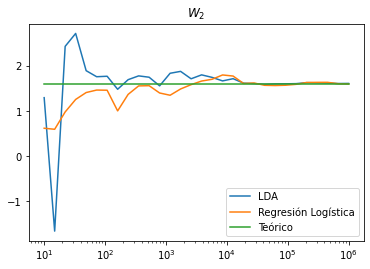

In [205]:
plt.title('$W_2$')
plt.semilogx(Ns, LDA_results_W2, label='LDA')
plt.semilogx(Ns, LR_results_W2, label='Regresión Logística')
plt.semilogx(Ns, [W2]*len(Ns), label='Teórico')
plt.legend()
plt.show()

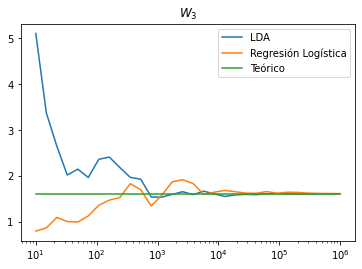

In [206]:
plt.title('$W_3$')
plt.semilogx(Ns, LDA_results_W3, label='LDA')
plt.semilogx(Ns, LR_results_W3, label='Regresión Logística')
plt.semilogx(Ns, [W3]*len(Ns), label='Teórico')
plt.legend()
plt.show()

In [207]:
print(clf_LR.coef_, clf_LR.intercept_)

[[1.60338224 1.59483831 1.61255073]] [-9.62859333]


In [208]:
print(clf_LDA.coef_, clf_LDA.intercept_) 

[[1.59726599 1.60761901 1.60615866]] [-9.62169126]


In [210]:
print(clf_LDA.means_)

[[ 2.77712048e-04  2.85767678e-04 -6.49037531e-05]
 [ 3.99933578e+00  3.99961248e+00  4.00005797e+00]]


In [211]:
print(clf_LDA.scalings_)

[[0.36412841]
 [0.36648859]
 [0.36615567]]


In [212]:
clf_LDA.xbar_

array([1.99980675, 1.99994912, 1.99999653])

In [0]:
clf_LDA.scalings_

array([[1.13120008],
       [0.04750612]])

In [0]:
clf_LDA.means_

array([[-0.08129935, -0.38380169],
       [ 1.91870065,  1.61619831]])